# Naive Bayes

## Import and Prepare the Data

[pandas](https://pandas.pydata.org/) provides excellent data reading and querying module,[dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), which allows you to import structured data and perform SQL-like queries. We also use the [mglearn](https://github.com/amueller/mglearn) package to help us visualize the data and models.

Here we imported some house price records from [Trulia](https://www.trulia.com/?cid=sem|google|tbw_br_nat_x_x_nat!53f9be4f|Trulia-Exact_352364665_22475209465_aud-278383240986:kwd-1967776155_260498918114_). For more about extracting data from Trulia, please check [my previous tutorial](https://www.youtube.com/watch?v=qB418v3k2vk).

We use the house type as the [dependent variable](https://en.wikipedia.org/wiki/Dependent_and_independent_variables) and the house ages and house prices as the [independent variables](https://en.wikipedia.org/wiki/Dependent_and_independent_variables).

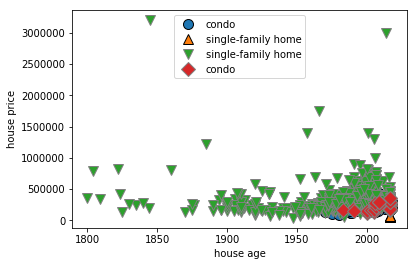

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import pandas
import numpy as np
import mglearn
from collections import Counter

df = pandas.read_excel('house_price_label.xlsx')
# combine multipl columns into a 2D array
# also convert the integer data to float data
X = np.column_stack((df.built_in.astype(float),df.price.astype(float))) 
y = df.house_type
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.3,stratify = y, random_state=0) 

# for classification, make sure a stratify splitting method is selected
mglearn.discrete_scatter(X[:,0],X[:,1],y) # use mglearn to visualize data

plt.legend(y,loc='best')
plt.xlabel('house age')
plt.ylabel('house price')
plt.show()

## Classification

The [Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html) model is used to classify the house types based on the house ages and  prices. Specifically, the [Gaussian Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) is selected in this classification. We also calculate the [Accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score) and the [Kappa](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html) score of our classification on the training and test data.

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import cohen_kappa_score

gnb = GaussianNB()
gnb.fit(X_train,y_train)

print("Training set accuracy: {:.2f}".format(gnb.score(X_train, y_train)))
print ("Training Kappa: {:.3f}".format(cohen_kappa_score(y_train,gnb.predict(X_train))))
print("Test set accuracy: {:.2f}".format(gnb.score(X_test, y_test)))
print ("Test Kappa: {:.3f}".format(cohen_kappa_score(y_test,gnb.predict(X_test))))

Training set accuracy: 0.74
Training Kappa: 0.419
Test set accuracy: 0.75
Test Kappa: 0.426


## Visualize the Result

We plot the predicted results of the training data and the test data.

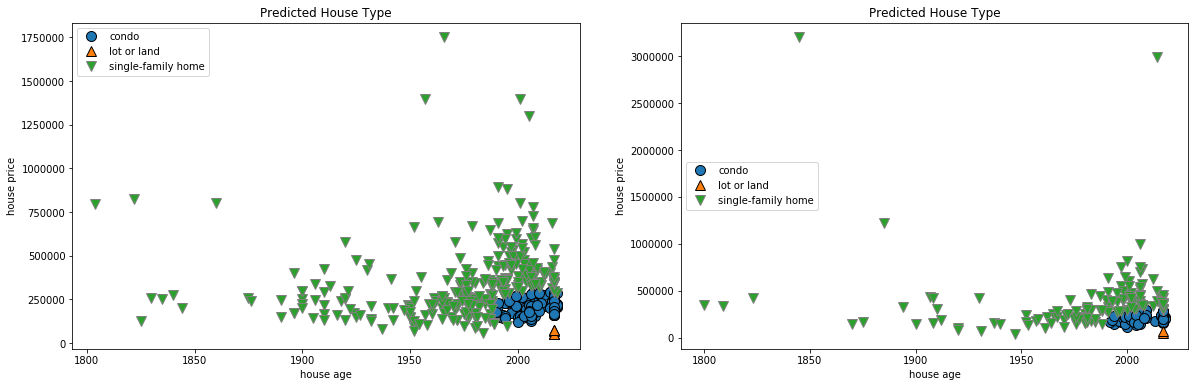

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
for ax,data in zip(axes,[X_train,X_test]):
    mglearn.discrete_scatter(data[:,0],data[:,1],gnb.predict(data),ax=ax) # use mglearn to visualize data

    ax.set_title("{}".format('Predicted House Type'))
    ax.set_xlabel("house age")
    ax.set_ylabel("house price")
    ax.legend(loc='best')

We check the distribution of the independent variables for each house type.

house_type
condo                 [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
lot or land           [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
single-family home    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
townhouse             [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

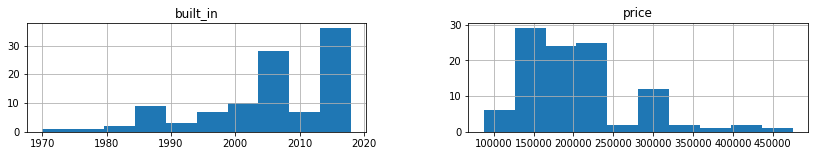

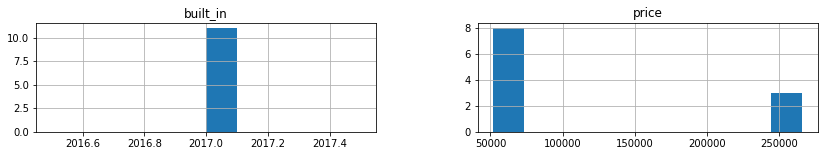

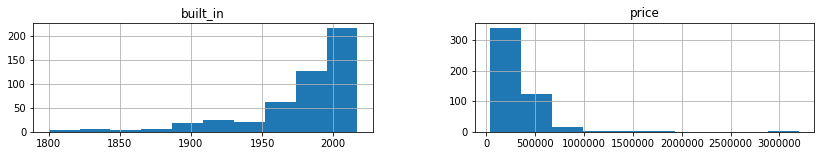

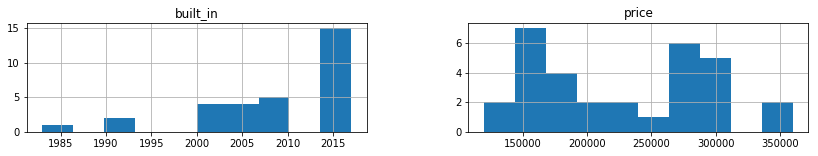

In [6]:
df.groupby('house_type').hist(figsize=(14,2),column=['price','built_in'])

The [Gaussian Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) assumes that each feature follows a normal distribution. Here we plot the [pdf](https://en.wikipedia.org/wiki/Probability_density_function) of each feature in the training data  for each house type.


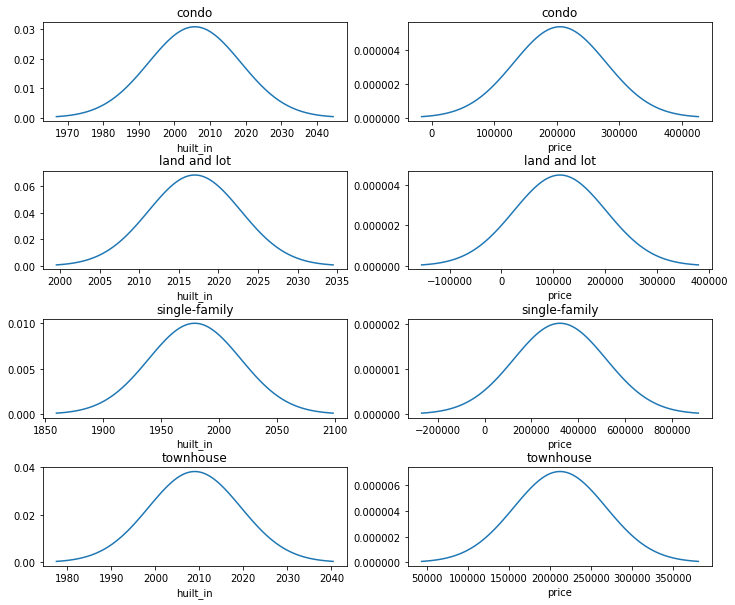

In [5]:
import matplotlib.mlab as mlab
import scipy.stats

house_type = ['condo','land and lot','single-family','townhouse']
house_feature =['huilt_in','price']
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
for j in range(4):
    for i in range(2):
        mu = gnb.theta_[j,i] # get mean value of each feature for each class
        sigma=np.sqrt(gnb.sigma_ [j,i])# get std value of each feature for each class
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        axes[j][i].plot(x,scipy.stats.norm.pdf(x, mu, sigma) )
        axes[j][i].set_title("{}".format(house_type[j]))
        axes[j][i].set_xlabel(house_feature[i])
plt.subplots_adjust(hspace=0.5)
